In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
def add_layer(input_data,input_size,output_size,active_function=None):
    with tf.name_scope('weights'):
        weights=tf.Variable(tf.random_normal([input_size,output_size]),name='w')
    with tf.name_scope('biases'):
        biases=tf.Variable(tf.random_normal([1,output_size]),name='b')
    if active_function==None:
        output_data=tf.matmul(input_data,weights)+biases
    else:
        output_data=active_function(tf.matmul(input_data,weights)+biases)
    return output_data

In [4]:
x_data=np.linspace(0,np.pi,400)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=3*np.sin(x_data)+0.5+noise

In [5]:
with tf.name_scope('inputs'):
    xs=tf.placeholder(tf.float32,[None,1],name='x_input')
    ys=tf.placeholder(tf.float32,[None,1],name='y_input')

In [6]:
layer1=add_layer(xs,1,10,active_function=tf.nn.relu)
layer2=add_layer(layer1,10,1,active_function=tf.nn.relu)

In [7]:
with tf.name_scope('loss'):
    diff=tf.reduce_mean(tf.reduce_sum(tf.square(layer2-ys),reduction_indices=[1]))

In [8]:
with tf.name_scope('train'):
    optimizer=tf.train.GradientDescentOptimizer(0.02).minimize(diff)

In [9]:
sess=tf.Session()

In [10]:
sess.run(tf.initialize_all_variables())
writer=tf.summary.FileWriter('logs/',sess.graph)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [11]:
for i in range(50001):                                       ###这个计算还不是每一次都能学习成功，大多时候都是学习失败，layer2是一条水平直线
    sess.run(optimizer,feed_dict={xs:x_data,ys:y_data})
    if i%500==0:
        print(i,sess.run(diff,feed_dict={xs:x_data,ys:y_data}))

0 6.4146852
500 0.05125879
1000 0.013923819
1500 0.009280679
2000 0.008346529
2500 0.008008807
3000 0.0077988287
3500 0.0076236827
4000 0.007478793
4500 0.0073735835
5000 0.007278643
5500 0.0071989144
6000 0.007129841
6500 0.0070562507
7000 0.006995834
7500 0.0069319475
8000 0.006876492
8500 0.0068271672
9000 0.0067888363
9500 0.0067504793
10000 0.006720489
10500 0.0066892873
11000 0.0066543748
11500 0.0066250884
12000 0.0065999837
12500 0.0065741334
13000 0.006551397
13500 0.006524437
14000 0.006502322
14500 0.00648137
15000 0.0064534605
15500 0.0064324904
16000 0.006411755
16500 0.0063880696
17000 0.006367105
17500 0.0063356115
18000 0.0063106744
18500 0.006282811
19000 0.006258503
19500 0.006225945
20000 0.0061937533
20500 0.0061594825
21000 0.006132475
21500 0.0060934387
22000 0.0060538924
22500 0.006012937
23000 0.0059704203
23500 0.005916033
24000 0.0058656614
24500 0.005811641
25000 0.0057576774
25500 0.0056926366
26000 0.005623491
26500 0.0055452413
27000 0.005467774
27500 0.00

In [12]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

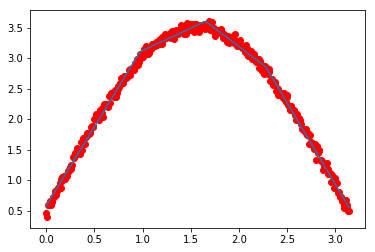

In [13]:
plt.scatter(x_data,y_data,c="r")
plt.plot(x_data,sess.run(layer2,feed_dict={xs:x_data,ys:y_data}))

In [14]:
pwd

'C:\\Users\\DELL\\testing and learning\\selfize'